# Job-Hunt NLP Demo - Part 4

Which demo will also be useful in doing some quick NLP work to see how my résumé's word distribution matches that from job descriptions.

There's a wonderful project out there, [MyBinder](https://mybinder.org), which allows you to interactively run a Jupyter notebook completely online. It's nice to have when you'd like to play with code and see better the outputs that come from running that code. I've had some problems with images going down, but I'm going to work to keep this one up.

The link to the online, interactive notebook - the binder - is at the badge you see right here

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_04_NLPPresentationJobHunt_DemoWordFreq.ipynb)

<hr/>

## We are calling this version 0.1.003

It's the FamilySearch CJKV jobs applied for in August 2023, but we're splitting it into smaller notebooks. Hopefully, MyBinder can load each more quickly. We'll see how things work with pickling variables between the parts.

**Edit:** It worked pretty well.

<hr/>

## What we are doing in Part 4

First of all, let's give you a MyBinder badge link which specifies the version and the part.

[![Binder](./badge_logo_dwb_v_0-1-003_part_4.png)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_04_NLPPresentationJobHunt_DemoWordFreq.ipynb)

@TODO : write a thingie or two about what we're doing in Part 4.

<hr/>

## Let's start by un-pickle-ing the things we'll need.

In [1]:
import pickle

pickle_filename_3_to_4 = "important_part_3_vars.pkl"

unpickled_array = []

with open(pickle_filename_3_to_4, 'rb') as pfh:
    unpickled_array = pickle.load(pfh)
##endof:  with open ... as pfh # (pickle file handle)

In [2]:
local_job_desc_filenames = unpickled_array[0]
local_job_appl_filenames = unpickled_array[1]
description_word_counts = unpickled_array[2]
application_word_counts = unpickled_array[3]
list_of_display_table_desc = unpickled_array[4]

## Comparing a specific word in both distributions - nice visual

### First, a review of where we've been @TODO

@TODO Review what we've done.

Good things are what we've done.

From our previous stuff, there are a couple of nice functions that we're just copying and pasting, because it seems transferring functions via pickle file is a nightmare

In [3]:
def get_description_word_at_rank(this_rank = 1, 
                                 this_desc_fname_idx=0
                                ):
    this_idx = this_rank # the header is index 0
    this_table_to_use = \
      list_of_display_table_desc[this_desc_fname_idx]
    this_word = this_table_to_use[this_rank][0]
        
    return this_word
##endof:  get_description_word_at_rank(<params>)

In [4]:
def get_application_word_at_rank(this_rank = 1):
    this_idx = this_rank # the header is index 0
    this_appl_fname_idx=0
    this_table_to_use = \
      list_of_display_table_appl[this_appl_fname_idx]
    this_word = this_table_to_use[this_rank][0]
    
    return this_word
##endof:  get_description_word_at_rank(<params>)

## A better way to compare

### Seems like a good time to look at comparisons

#### Between the résumé and the different job descriptions

In [5]:
def find_word_in_both_display_lists(word_to_find,
                                    display_list_1_description,
                                    display_list_2_application,
                                    name_of_display_list_1=None,
                                    name_of_display_list_2=None,
                                    do_print_details=False
                                   ):
    index_count_1 = 0 # skip header
    index_for_found_in_1 = 0
    
    #loop_display_list = display_list_1_description
    
    word_found_in_1 = False
    for my_entry_1 in display_list_1_description:
        index_count_1 += 1
        if my_entry_1 == word_to_find:
            word_found_in_1 = True
            index_for_found_in_1 = index_count_1
            break
        ##endof:  if my_entry_1 == word_to_find
    ##endof:  for my_entry_1 in display_list_1
    
    index_count_2 = 0 # skip header
    index_for_found_in_2 = -1
    word_found_in_2 = False
    for my_entry_2 in display_list_2_application:
        index_count_2 += 1
        if my_entry_2 == word_to_find:
            word_found_in_2 = True
            index_for_found_in_2 = index_count_2
            break
        ##endof:  if my_entry_2 == word_to_find
    ##endof:  for my_entry_1 in display_list_1
    
    to_return_found_1 = None
    
    if word_found_in_1:
        to_return_found_1 = index_for_found_in_1 # - 1
        if do_print_details:
            print()
            print(f"The word, {word_to_find}, has rank, {to_return_found_1},")
            if name_of_display_list_1 is not None:
                print(f"in list, {name_of_display_list_1}.")
            #endof:  if name_of_display_list_1 is not None
        ##endof:  if do_print_details
    ##endof:  if word_found_in_1
    
    to_return_found_2 = None
    
    if word_found_in_2:
        to_return_found_2 = index_for_found_in_2 # - 1
        if do_print_details:
            print()
            print(f"The word, {word_to_find}, has rank, {to_return_found_2},")
            if name_of_display_list_2 is not None:
                print(f"in list, {name_of_display_list_2}.")
            ##endof:  if name_of_display_list_2 is not None
        ##endof:  if do_print_details
    ##endof:  if word_found_in_2
    
    return to_return_found_1, to_return_found_2
    
##endof:  find_word_in_both_lists

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Next line only for Jupyter notebook.
%matplotlib inline

def get_freq_histo_specific(word_count_ordered_dict_1,
#                           #word_count_ordered_dict_2,
                            rank_index_1 = 1,
                            n_surrounding_words = 3,
                            do_show_word_and_count_lists=False,
                            do_show_frac_not_count=True,
                            ylim_bottom_val=None,
                            ylim_top_val=None,
                            ax1=None,
                            #ax2=None,
                           ):
    '''
    @return  an axis from matplotlab (with the object - histogram - in it)
    '''
    
    if ax1 is None:
        fig = plt.figure(figsize=(10, 3))
        ax1 = fig.add_subplot(111)
        #ax2 = fig.add_subplot(121)
    ##endof:  if ax1 is None
    
    counts_pre = None
    fractions_pre = None
    
    if do_show_frac_not_count:
        frac_wd_cnt_list_of_tuples = \
          [ ( k, (v / len(word_count_ordered_dict_1)) )
                  for k, v in word_count_ordered_dict_1.items() ]
        fractions_pre = [ this_item[1]
                           for this_item in frac_wd_cnt_list_of_tuples ]
    else:
        counts_pre = list(word_count_ordered_dict_1.values())
    ##endof:  if/else do_show_frac_not_count
    
    words_pre  = list(word_count_ordered_dict_1.keys())
    
    counts = None
    fractions = None
    
    # Pad the list with zero-count and empty-set characters
    len_lists = 2 * n_surrounding_words + 1
    
    if do_show_frac_not_count:
        fractions = [0] * len_lists
    else:
        counts = [0] * len_lists
    ##endof:  if/else do_show_frac_not_count
    
    words  = ["\u2205"] * len_lists # empty-set glyph codepoint
    
    #  Fill anything with a valid index with the corresponding
    #+ word/count
    
    current_output_index = -1
    
    for i in range(rank_index_1 - n_surrounding_words -1,
                   rank_index_1 + n_surrounding_words
                  ):
        current_output_index += 1
        if i < 0:
            pass
        else:
            if do_show_frac_not_count:
                fractions[current_output_index] = fractions_pre[i]
            else:
                counts[current_output_index] = counts_pre[i]
            ##endof:  if/else do_show_frac_not_count
            
            words[current_output_index] = words_pre[i]
        ##endof:  if/else i < 1
    ##endof:  for i in range
    
    ## making sure things are working
    if do_show_word_and_count_lists:
        if do_show_frac_not_count:
            print(f"fractions: {fractions}")
        else:
            print(f"counts: {counts}")
        ##endof:  if/else do_show_frac_not_count
        
        print(f"words:  {words}")
    ##endof:  if do_show_word_and_count_lists
    
    x_words_coords = np.arange(len(words))
    
    if do_show_frac_not_count:
        ax1.bar(x_words_coords, fractions, align='center')
    else:
        ax1.bar(x_words_coords, counts, align='center')
    ##endof:  if/else do_show_frac_not_count
    
    ax1.set_xticks(x_words_coords)
    ax1.set_xticklabels(words, rotation=45, ha='right')
    
    ax1.set_ylim(ylim_bottom_val, ylim_top_val)
    
##endof:  get_freq_histo_specific

<strike>Below will be code to look for the top 25 (maybe less, maybe more) description words. I'll go through every word that appears 3 times, and I won't include any that appear only twice or once. I'll see where they appear in my résumé list.</strike>

<strike>This will be easily automated and done with a for loop or list comprehension. However, I want to look at some things more manually - that should make the automated stuff better.</strike>

I'm going to make this part more of a look-for-each-word thing. The display is too busy to show each word for each file.

I have a few improvements that would be good, soon:<br/>
  @TODO : get rid of one letter words<br/>
  @TODO : look through the rest of the list to get rid of junk

I want to match two histograms for this stuff, with e.g. the job description's word and (up to) 3 (or 4 or 5 or 6 or 2 or 1 or ...) words more frequent and (up to) 3 words less frequent. I'm going to bring up a picture of the histograms for my brainstorming.

### Here are the specific word-rank comparison histograms...

In [7]:
str_for_choices = f"Choices are any of: {list(range(len(local_job_desc_filenames)))}"

####  For this section, we have calculated everything, but show just two files being compared

Well, when we get to the compare-all-top-25 histograms, we'll show all the comparisons.

For the comparisons of the top-ranked words, just two files at a time

Another thing, to keep this Quick and Reckless (not spending too much time), I'm dispensing with my cherished 80 characters per line. `: (`

<b>You can change the `desc_fname_idx_to_show` to any of the numbers in the next output ...</b>

In [8]:
print(str_for_choices.replace(r"[", r"{").replace(r"]", r"}"))

Choices are any of: {0, 1, 2, 3}


Output was most recently

Choices are any of: `{0, 1, 2, 3}`

<b>... to see results for a specific job description.</b>

In [9]:
for my_desc_index in range(len(local_job_desc_filenames)):
    print(f"Choice {my_desc_index} : {local_job_desc_filenames[my_desc_index]}")

Choice 0 : desc_CJKV_dev5.txt
Choice 1 : desc_CJKV_dev4.txt
Choice 2 : desc_CJKV_dev3.txt
Choice 3 : desc_CJKV_devInTest3.txt


### For your choice of job description

In [10]:
# Make your choice:
desc_fname_idx_to_show = 0

### Now we can continue with the top-ranked word in the job description

In [11]:
top_word_rank_in_desc = 1
this_corresponding_word = get_description_word_at_rank(top_word_rank_in_desc)
this_desc_idx = desc_fname_idx_to_show

word_indexes = find_word_in_both_display_lists(
                 this_corresponding_word,
                 description_word_counts[desc_fname_idx_to_show],
                 application_word_counts[0],
                   #  we only have one table - 
                   #+ it's at any legal index;
                   #+ let's choose 0
                 name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
                 name_of_display_list_2 = "application_word_counts[0]"                
)

print()
print( ("(rank in description, rank in application) for the word,"
        f" '{this_corresponding_word}': {word_indexes}"
       )
)


(rank in description, rank in application) for the word, 'software': (1, 2)


### You might need to look back at the frequency-as-fraction histogram

So you can set an appropriate maximum frequency to plot.

#### Until I run through the math of Zipf's law with Mandlebrot's generalization

Sources:
 - A discussion [here](https://web.archive.org/web/20230825202630/https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/)
 - Original Papers (Note that these are Google Scholar entries for books or papers. Oh, and they're the archived versions from the archive.org Wayback Machine.)
   - Zipf [1936](https://web.archive.org/web/20230825203006/https://scholar.google.com/scholar_lookup?title=The+Psychobiology+of+Language&author=G+Zipf&publication_year=1936&), [1949](https://web.archive.org/web/20230825203504/https://scholar.google.com/scholar_lookup?title=Human+Behavior+and+the+Principle+of+Least+Effort&author=G+Zipf&publication_year=1949&)
   - Mandelbrot [1953](https://web.archive.org/web/20230825204141/https://scholar.google.com/scholar_lookup?journal=Communication+theory&title=An+informational+theory+of+the+statistical+structure+of+language&author=B+Mandelbrot&publication_year=1953&pages=486-502&) (also available as [PDF](https://web.archive.org/web/20230825204201/http://pdodds.w3.uvm.edu/research/papers/others/1953/mandelbrot1953a.pdf)), [1962](https://web.archive.org/web/20230825204400/https://scholar.google.com/scholar_lookup?journal=Structure+of+language+and+its+mathematical+aspects&title=On+the+theory+of+word+frequencies+and+on+related+markovian+models+of+discourse&author=B+Mandelbrot&publication_year=1962&pages=190-219&) (also available as [PDF](https://web.archive.org/web/20230825204650/https://users.math.yale.edu/~bbm3/web_pdfs/024jakobson.pdf))
   
`The rth most frequent word has a frequecy` $f(r)$ `that scales according to`

$f(r) \propto 1 / \left[(r + \beta)^\alpha\right]$

`with` $\alpha \approx 1$ `and` $\beta \approx 2.7$. If we take the frequency of the word at rank $r$ as a fraction of the total words, and considering a text with $N$ distinct words, then the fractional frequency of a word with rank, $r$, will be $f(r) / N$. The sum of these fractions is one. So basically, we have $K \cdot \sum_{r=1}^N { f(r) / N} = 1$, with $K$ being the constant of proportionality. To make things a little easier as we go forward, I'll also define $\kappa \stackrel{\text{def}}{=} 1 / K$



`  ` $\Rightarrow$ `  ` $\kappa$ `= ` $\frac{1}{N} \cdot f(r)$

`            = (1/N) * [1/(1+2.7) + 1/(2+2.7) + 1/(3+2.7) + ... + 1/{(N-1)+2.7} + 1/(N+2.7)]`.

So, all I need to do is consider a text with $N$ distinct words and calculate $\kappa$, then the frequency of appearance for the word having rank, $r$, as a fraction of total words would be $\left(K / N \right) \cdot \left[1 / \left(r+2.7\right)\right]$. 

Let's designate $\pi(r)$ be the proportion of total words that the word of rank $r$ makes of the total - the same thing we've been designating as the frequency of appearance as a fraction.

This then gives us

$1 \approx \left[1 / (N \kappa)\right] \cdot f(r) = \left( \frac{1}{N \cdot \kappa} \right) \cdot \left[ 1 / \left( r + \beta \right) \right]$

Let's define $P$ as our partial sum, i.e.

$P \stackrel{\text{def}}{=} \sum_{r=1}^N \left[1 / \left(r + \beta\right)\right]$

We then obtain
1 \approx P / \left( N \cdot \kappa \right)$

Once again, we have $\pi(r)$ defined as the frequency as a fraction. (It is the proportion of all words which are the word with rank, $r$. One could also think of it as the probability of the word.)

Remember in all this that $\beta \approx 2.7$

### Looks like time for partial sums

Note that, in my experience, I haven't had any documents (even any combined documents) which had more than on-the-order-of-$10^3$ words. That means that the original sum can be put into the algorithm. However, I thought there might be some insights found by looking at the partial sums.

I looked at the [Euler-Maclaurin Formula](https://web.archive.org/web/20230827161607/https://en.wikipedia.org/wiki/Euler%E2%80%93Maclaurin_formula) in the form useful for asymptotic expansion of sums (The sum of the infinite version of our series, $\sum_{n=0}^\infty{\frac{1}{n+\beta}}$ diverges to positive infinity.)

$\sum_{n=a}^N {g(x)} \sim \int_a^N {g(x) dx} + \frac{g(N) +g(a)}{2} + \sum_{k=1}^\infty {\frac{B_{2k}}{(2k)!} \left( g^\left( 2k-1 \right)(N) - g^\left( 2k-1 \right)(a) \right)}$

_Note that $\sim$ means asymptotically approaches_

where $B_p$ is the $p^{th}$ [Bernoulli polynomial](https://web.archive.org/web/20230827163846/https://en.wikipedia.org/wiki/Bernoulli_polynomials) and $g^\left( q \right)(z)$ is the $q^{th}$ derivative of the function, $g(z)$

I was led to this by a [Q&A on Quora](https://www.quora.com/Whats-the-general-formula-to-find-the-partial-sum-of-any-series-f-n) which requires a free subscription and which does not allow the archive.org Wayback Machine to archive it.

### Proportion (fraction) of appearances of top word to number of total words

#### (Important formula)

For a text with $N$ distinct words, the proportion/(fraction) of the word with rank, $r$ is

$\pi(r) = \left[1 / \left(\kappa \cdot N\right) \right] \cdot \left[1 / \left(r+2.7\right)\right]$

### Too much space needed for that

Thank goodness (and [Stephen Wolfram](https://web.archive.org/web/20230827170213/https://en.wikipedia.org/wiki/Stephen_Wolfram) for [Wolfram|Alpha](wolframalpha.com/input?i=sum_%28n%3D0%29%5Einfinity+1%2F%28n+%2B+b%29)

```
alt_text_str = ( "WolframAlpha computational intelligence. "
                 "Entry: the sum from n equals zero to infinity "
                 "of one divided by quantity n plus b end quantity. "
                 "Answers include the following. "
                 "Infinite sum: [The entry] diverges to infinity. "
                 "Partial sum formula: the sum from n equals zero to "
                 "k of one over quantity n plus beta equals psi "
                 "super zero of quantity beta plus k plus one end "
                 "quantity minus psi super zero of b where psi super "
                 "n of x is the nth derivative of the digamma "
                 "function"
)
```

<br/>
<div>
  <img src="partial_sum_from_wolfram_alpha.jpg"
       alt="WolframAlpha computational intelligence. Entry: the sum from n equals zero to infinity of one divided by quantity n plus b end quantity. Answers include the following. Infinite sum: [The entry] diverges to infinity. Partial sum formula: the sum from n equals zero to k of one over quantity n plus beta equals psi super zero of quantity beta plus k plus one end quantity minus psi super zero of b where psi super n of x is the nth derivative of the digamma function"
       width="auto">
</div>
<br/>


So, with that 'Partial sum formula' information, we can write

$\pi(r) = \left[1 / \left(\kappa \cdot N\right) \right] \cdot \left[1 / \left(r+2.7\right)\right]$

where it is very important to find

$\kappa = \frac{1}{K} = \left( 1 / N \right) \cdot \sum_{r=1}^N { \left[ 1 / \left( r + \beta \right) \right] } = \left( 1 / N \right) \cdot \left[ \psi^{(0)}\left( \beta + N + 1 \right) - \psi^{(0)}\left( \beta \right) \right]$

### Some hints for implementing that in `Python`. 

Thanks to John D. Cook, PhD for the information at [Gamma and related functions in SciPy](https://web.archive.org/web/20230827165703/https://www.johndcook.com/blog/gamma_python/) at https://www.johndcook.com/blog/gamma_python/

> Psi and polygamma functions
> The derivative of `log( Γ(z) )` is denoted `ψ(z)` and is implemented in the `psi` function. The `nth` derivative of `ψ(z)` is implemented in `psi(n, z)`.

Actually, further info was needed - I found it at the SciPy documentation

[scipy.special.psi](https://web.archive.org/web/20230831024803/https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.psi.html)

[scipy.special.digamma](https://web.archive.org/web/20230831024856/https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.digamma.html)

[scipy.special.polygamma](https://web.archive.org/web/20230831024010/https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.polygamma.html)

In [12]:
description_idx_to_show = 0 # For this version, can be 0,1,2,3

n_desc_words_array = [0] * len(description_word_counts)

for i in range(0, len(description_word_counts)):
    n_desc_words_array[i] = \
      len(description_word_counts[i])
##endof:  for i in range(len)

In [13]:
n_desc_words_array

[325, 293, 273, 265]

In [14]:
from scipy.special import polygamma 
  #  I needed to pip install scipy. I'll update 
  #+ the instructions and the environment.

def max_probability_for_graph(n_distinct_words,
                              this_rank=1,
                              do_show_intermediates=False):
    beta = 2.7
    
    approx_sum = (
          polygamma(0, beta + n_distinct_words + 1)
        - polygamma(0, beta)
    )
    
    if do_show_intermediates:
        print()
        print(f"To check, approx_sum = {approx_sum}")
    ##endof:  if do_show_intermediates
    
    kappa = approx_sum / n_distinct_words
    
    if do_show_intermediates:
        print()
        print(f"To check, kappa = {kappa}")
        print()
    ##endof:  if do_show_intermediates
    
    calculated_proportion = (   ( 1 / (kappa * n_distinct_words) )
                              * ( 1 / (this_rank + beta) )
                           )
    
    return calculated_proportion
    
##endof:  max_probability_for_graph(n_distinct_words)


def kappa_by_partial_sum_terms(n_distinct_words,
                               do_show_intermediates=False):
    '''
    To check my implementation of Euler-Maclaurin
    '''
    
    beta = 2.7
    term_by_term_sum = 0
    
    for r in range(n_distinct_words):
        this_term = 1 / ( r + beta)
        term_by_term_sum += this_term
    ##endof:  for r in range(n_distinct_words)
    
    if do_show_intermediates:
        print()
        print(f"To check, term_by_term_sum = {term_by_term_sum}")
    ##endof:  if do_show_intermediates
    
    kappa = term_by_term_sum / n_distinct_words
    
    if do_show_intermediates:
        print()
        print(f"To check, kappa = {kappa}")
        print()
    ##endof:  if do_show_intermediates
    
    return kappa
    
##endof:  kappa_by_partial_sum_terms(n_distinct_words)

If you don't want to see the check of our Euler-Maclaurin/gamma/partial-sum stuff, set the boolean below to `False`.

In [15]:
do_show_the_check = True

if do_show_the_check:
    my_n_words = 325
    print()
    print(" Running kappa_by_partial_sum_terms")
    kappa_pst = kappa_by_partial_sum_terms(my_n_words, True)
    print("Things to check will be above. Though it might be")
    print("repeated, here is the function return,")
    print(f"  kappa_pst = {kappa_pst}")
    print()
    print()
    print()
    print()
    print("Results for other function, max_probability_for_graph.") 
    print("Sum value and kappa will be shown.")
    print("The candidate (read, 'not-sure-if-right')")
    print("value for the maximum theoretical fraction - i.e. the")
    print("fuction return - will be shown at the end.")
    print()
    max_frac = max_probability_for_graph(my_n_words, 1, True)
    print(f"  max_frac = {max_frac}")
    print()
##endof:  if do_show_the_check

print("\n\n\nThat ends up being _really_ close.")
print("I feel fine using the polygammas.")
print()
print("Come to think of it, I should")
print("@TODO : plot word frequency histogram with")
print("@TODO : theoretical Zipf/Mandelbrot value overlaid.")


 Running kappa_by_partial_sum_terms

To check, term_by_term_sum = 4.993788824927262

To check, kappa = 0.015365504076699267

Things to check will be above. Though it might be
repeated, here is the function return,
  kappa_pst = 0.015365504076699267




Results for other function, max_probability_for_graph.
Sum value and kappa will be shown.
The candidate (read, 'not-sure-if-right')
value for the maximum theoretical fraction - i.e. the
fuction return - will be shown at the end.


To check, approx_sum = 4.996840396486611

To check, kappa = 0.015374893527651111

  max_frac = 0.05408823352859203




That ends up being _really_ close.
I feel fine using the polygammas.

Come to think of it, I should
@TODO : plot word frequency histogram with
@TODO : theoretical Zipf/Mandelbrot value overlaid.


If things look off in the plot (i.e. it's cutting off part of a bar, or the bars look to small) you can override what is set up to be an automatic y-max from Zipf and Mandelbrot. In that case, look at the histogram you get below and change the `do_change_ymax` from `False` to `True`, and also change the value of `init_probability` inside the 

```
if do_change_ymax:
    ##!! HERE IS WHERE TO CHANGE THE VALUE, IF NEEDED !!##
    init_probability = 0.05
    ##!! THERE WAS WHERE TO CHANGE THE VALUE, IF WANTED !!##
##endof:  if do_change_ymax
```

part of the code to make the y-max appropriate. I hope any such things are statistical outliers and not Dave errors.

In [16]:
do_change_ymax = False

error_bars_frac = 0.1

theoretical_max_values = [0] * len(description_word_counts)

for desc_index in range(len(description_word_counts)):
    theoretical_max_values[desc_index] = \
      max_probability_for_graph(
        n_distinct_words=\
          n_desc_words_array[desc_index]
    )
##endof:  for desc_index in range(len(description_word_counts))

init_probability = \
        theoretical_max_values[desc_fname_idx_to_show]

if do_change_ymax:
    ##!! HERE IS WHERE TO CHANGE THE VALUE, IF NEEDED !!##
    init_probability = 0.05
    ##!! THERE WAS WHERE TO CHANGE THE VALUE, IF WANTED !!##
##endof:  if do_change_ymax

max_graph_proportion = init_probability * (1 + error_bars_frac)

print(f"max_graph_proportion: {max_graph_proportion}")

max_graph_proportion: 0.05949705688145124


this_corresponding_word: software
description_word_rank_1_desc_0.png


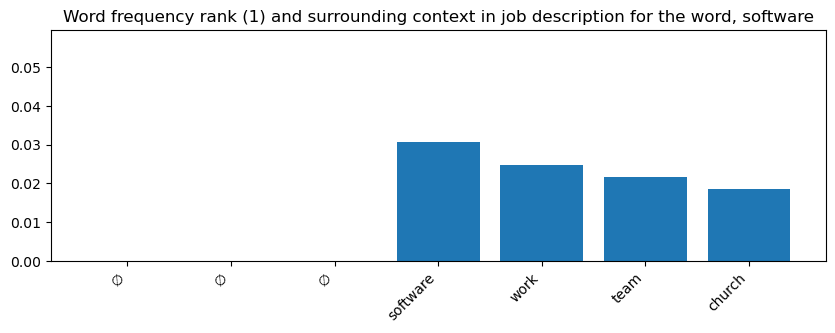

In [17]:
top_word_rank_in_desc = 1
this_desc_idx = top_word_rank_in_desc

this_corresponding_word = get_description_word_at_rank(top_word_rank_in_desc)

print(f"this_corresponding_word: {this_corresponding_word}")

rank_desc, _ = find_word_in_both_display_lists(
                this_corresponding_word,
                description_word_counts[desc_fname_idx_to_show],
                application_word_counts[0],
                   #  we only have one table - 
                   #+ it's at any legal index;
                   #+ let's choose 0
                name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
                name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_desc = ""

if rank_desc is None:
    import matplotlib.image as mpimg
    fig_filename_desc = "description_word_not_found.png"
    img = mpimg.imread(fig_filename_desc)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    get_freq_histo_specific(
            description_word_counts[desc_fname_idx_to_show],
            rank_index_1=this_desc_idx,
            n_surrounding_words=3,
            do_show_word_and_count_lists=False,
            ylim_top_val=max_graph_proportion
    )
    
    fig_filename_desc = (
            f"description_word_rank_{this_desc_idx}_"
            f"desc_{desc_fname_idx_to_show}.png"
    )
    
    print(fig_filename_desc)

    title_for_desc = (f"Word frequency rank ({rank_desc}) and surrounding context in "
                      f"job description for the word, {this_corresponding_word}"
                 )
    plt.title(title_for_desc)

    plt.savefig(fig_filename_desc,
                bbox_inches='tight')

    plt.show()
##endof:  if/else rank_desc

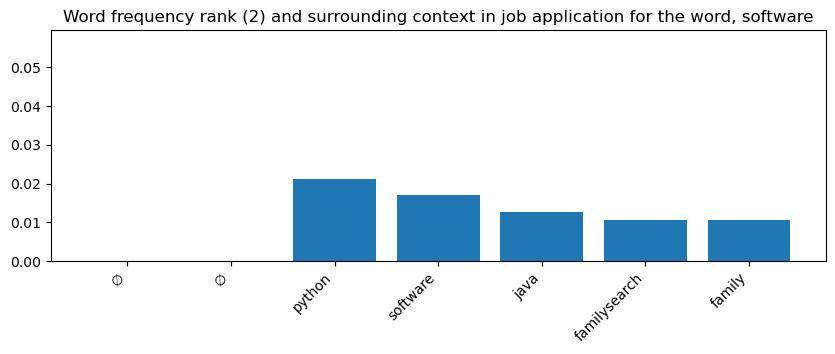

In [18]:
_, rank_appl = find_word_in_both_display_lists(
        this_corresponding_word,
        description_word_counts[desc_fname_idx_to_show],
        application_word_counts[0],
           #  we only have one table - 
           #+ it's at any legal index;
           #+ let's choose 0
        name_of_display_list_1 = f"description_word_counts[{this_desc_idx}]",
        name_of_display_list_2 = "application_word_counts[0]"
)

fig_filename_appl = ""

if rank_appl is None:
    import matplotlib.image as mpimg
    fig_filename_appl = "application_word_not_found.png"
    img = mpimg.imread(fig_filename_appl)
    imgplot = plt.imshow(img)
##endof:  if rank_desc
else:
    corresponding_index = rank_appl
    
    get_freq_histo_specific(application_word_counts[0],
                            rank_index_1=corresponding_index,
                            n_surrounding_words=3,
                            do_show_word_and_count_lists=False,
                            ylim_top_val=max_graph_proportion
    )

    fig_filename_appl = (f"application_word_rank_{corresponding_index}_"
                         f"desc_{desc_fname_idx_to_show}.png"
                        )

    title_for_appl = (f"Word frequency rank ({rank_appl}) and surrounding context in "
                      f"job application for the word, {this_corresponding_word}"
                     )
    plt.title(title_for_appl)

    plt.savefig(fig_filename_appl,
            bbox_inches='tight')

    plt.show()
##endof:  ##endof:  if/else rank_desc

In [19]:
print("  img src values for the two images:")
print(f'"{fig_filename_desc}"')
print(f'"{fig_filename_appl}"')

print()
print("  img alt values for the two images:")
alt_text_1 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job description text"'
             )
alt_text_2 = (f'"Histogram for the word, {this_corresponding_word}, in '
               'the job application text"'
             )
print(alt_text_1)
print(alt_text_2)

  img src values for the two images:
"description_word_rank_1_desc_0.png"
"application_word_rank_2_desc_0.png"

  img alt values for the two images:
"Histogram for the word, software, in the job description text"
"Histogram for the word, software, in the job application text"


### Change the img src values and img alt values, then see the histograms together

You might need to double-click on the image to get the html source. You also might need to click on the image (or image-not-found icon) just to make things reload.

Actually, I've found that a good way to make things re-render is to put `./` in front of the first `src="`, evaluate the cell, and then remove the `./`.

<br/>
<div>
  <img src="description_word_rank_1_desc_0.png"
       alt="Histogram for the word, software, in the job description text"
       width="auto">
</div>
<br/>

<br/>
<div>
  <img src="application_word_rank_2_desc_0.png"
       alt="Histogram for the word, software, in the job application text"
       width="auto">
</div>
<br/>

## When I Get to Part 5 - Detail $\forall$ 25 Top Words (Both) and Metrics

After the dash, that means, "Detail \[for all\] 25 Top Words (Both \[Job Description and Job Application\]) and Metrics.

### Basically making things more complete

I've got the basics of what I'll need and a bit more, but it feels weird not to have a metric. Part 5 will have a big image with lots of subplots to show the comparison of all 25 top description words and then any words in the application top 25 that won't have already shown up.

I'm not sure exactly what will be needed, but let's go ahead with ...

### Pickle time again

Then, the link for the Part 5 MyBinder will be included.

In [20]:
import pickle

pickle_filename_4_to_5 = "important_part_4_vars.pkl"

things_to_pickle_4 = [
    local_job_desc_filenames,
    local_job_appl_filenames,
    description_word_counts,
    application_word_counts,
    list_of_display_table_desc
]

with open(pickle_filename_4_to_5, 'wb') as pfh:
    pickle.dump(things_to_pickle_4, pfh)
##endof:  with open ... as pfh # (pickle file handle)

[Part 5 On GitHub](https://github.com/bballdave025/job-app-word-freq/blob/polished-5part-presented/Part_05_NLPPresentationJobHunt_DemoWordFreq.ipynb)

[Part 5 On MyBinder](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_05_NLPPresentationJobHunt_DemoWordFreq.ipynb)

Or, alternatively/eventually, use the badge as a link for the MyBinder version.

[![Binder](./badge_logo_dwb_v_0-1-003_part_5.png)](https://mybinder.org/v2/gh/bballdave025/job-app-word-freq/polished-5part-presented?labpath=Part_05_NLPPresentationJobHunt_DemoWordFreq.ipynb)

### Since we're at the end of what I've written now ...

## Output for Description and Application:

### &lt;FILL THIS IN&gt;

@TODO : I need to look at what I've done here in previous versions.

### Done

In [21]:
# #######################
# # No need to run again
# #####
# !powershell -c (Get-Date -UFormat "%s_%Y%m%dT%H%M%S%Z00") -replace '[.][0-9]*_', '_'

The output when I finished everything - the last thing of which was the automatic y-max from Zipf/Mandelbrot, the output from the previous cell was

```
1693431329_20230830T213529-0600
```

## Future Steps

- Look at ranking, counts, percentage, etc. for FamilySearch's (job description's) top 25 words as found in my (job application's) word counts, then vice-versa. 
  - Code setup completed 2023-08-20. Putting all 25 in would make a very busy display, so I just did a few.
- Get rid of words that are necessary for grammar, but which don't matter too much in determining whether the two documents match up. (Found term on 2023-08-07. It's "stopwords".)
  - Completed 2023-08-09

**Some new future steps**

- Do word counts for the pair of top 25, but then also do the fraction each word comprises of the whole (non-stopword) text.
  - Completed sometime before 2023-08-27

- Do histogram plots with word frequecy as a fraction, then overlay the theoretical Zipf/Mandelbrot word frequency as a fraction.